In [ ]:
pip install face-recognition

In [ ]:
pip install Dlib

In [ ]:
pip install chart_studio

In [ ]:
import face_recognition
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Face_to_BMI/Data/annotation.csv')

In [ ]:
df

,image,height,weight,BMI
0,f_001,1.55,61.0,25.390219
1,f_002,1.76,85.0,27.440599
2,f_003,1.78,56.0,17.674536
3,f_004,1.63,63.0,23.711845
4,f_005,1.76,54.0,17.432851
...,...,...,...,...
1021,m_509,1.91,116.0,31.797374
1022,m_510,1.93,111.0,29.799458
1023,m_511,1.88,109.0,30.839746
1024,m_512,1.78,75.0,23.671254


In [ ]:
dff = df[0:513]
dfm = df[513:]

In [ ]:
dff.head()

,image,height,weight,BMI
0,f_001,1.55,61.0,25.390219
1,f_002,1.76,85.0,27.440599
2,f_003,1.78,56.0,17.674536
3,f_004,1.63,63.0,23.711845
4,f_005,1.76,54.0,17.432851


In [ ]:
dfm.head()

,image,height,weight,BMI
513,m_001,1.83,84.0,25.082863
514,m_002,1.83,75.0,22.395413
515,m_003,2.11,122.0,27.402799
516,m_004,1.80,74.0,22.839506
517,m_005,1.82,77.0,23.245985


**Females**

Text(0.5, 0, 'Height(m)')

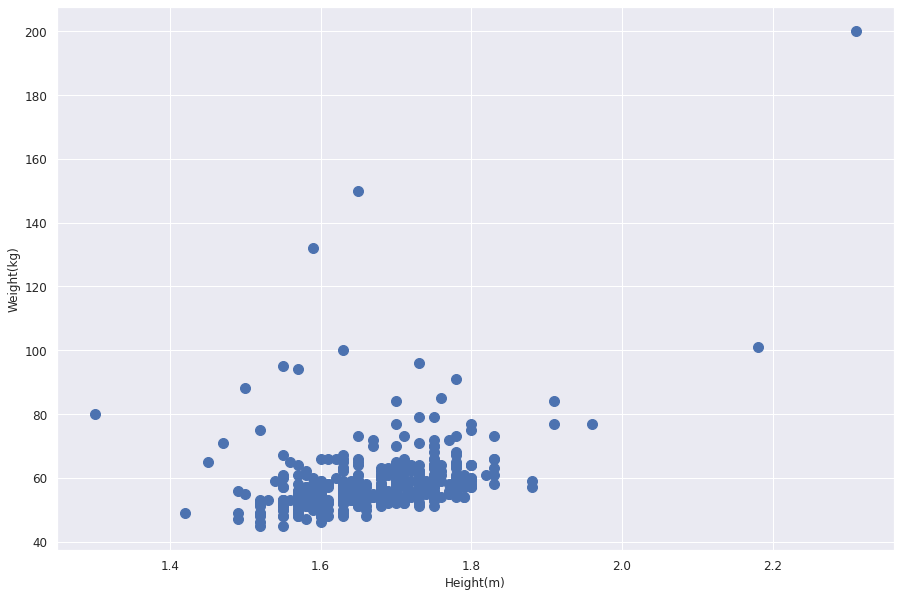

In [ ]:
sns.set()
f_plot = dff.plot(style='o', x='height', y='weight', figsize=(15,10), grid=True, markersize=10, legend=False, fontsize=12)
f_plot.set_ylabel('Weight(kg)', fontsize=12)
f_plot.set_xlabel('Height(m)', fontsize=12)

In [ ]:
print('Average Height = ' + str(round(dff['height'].mean(), 2)) + 'm, Average Weight = ' + str(round(dff['weight'].mean(), 2)) + 'kg')

Average Height = 1.67m, Average Weight = 58.34kg


**Males**

Text(0.5, 0, 'Height(m)')

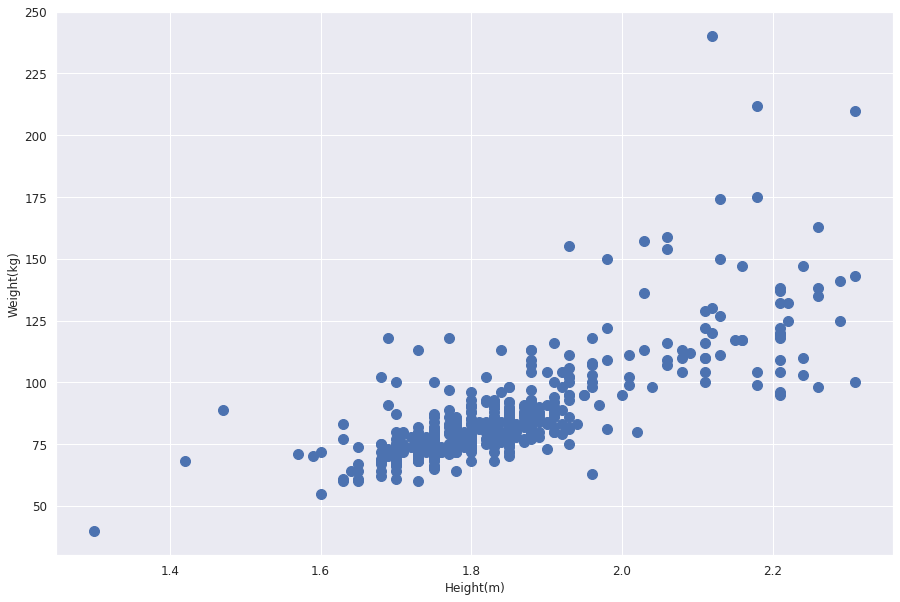

In [ ]:
f_plot = dfm.plot(style='o', x='height', y='weight', figsize=(15,10), grid=True, markersize=10, legend=False, fontsize=12)
f_plot.set_ylabel('Weight(kg)', fontsize=12)
f_plot.set_xlabel('Height(m)', fontsize=12)

In [ ]:
print('Average Height = ' + str(round(dfm['height'].mean(), 2)) + 'm, Average Weight = ' + str(round(dfm['weight'].mean(), 2)) + 'kg')

Average Height = 1.85m, Average Weight = 86.93kg


# Extract face embedding using facenet pretrained architecture

In [ ]:
def get_face_encoding(image_path):
    try:
      picture_of_me = face_recognition.load_image_file(image_path)
    except FileNotFoundError:
      print(image_path + " no file found")
      return np.zeros(128).tolist()
    my_face_encoding = face_recognition.face_encodings(picture_of_me)
    if not my_face_encoding:
        print(image_path + " no face found !!!")
        return np.zeros(128).tolist()
    return my_face_encoding[0].tolist()

In [ ]:
all_faces = []
for image_name in df.image:
  face_enc = get_face_encoding('/content/drive/My Drive/Face_to_BMI/Data/Images_vip/'+image_name+'.jpg')
  all_faces.append(face_enc)

/content/drive/My Drive/Face_to_BMI/Data/Images_vip/f_090.jpg no face found !!!
/content/drive/My Drive/Face_to_BMI/Data/Images_vip/f_325.jpg no face found !!!
/content/drive/My Drive/Face_to_BMI/Data/Images_vip/f_406.jpg no face found !!!
/content/drive/My Drive/Face_to_BMI/Data/Images_vip/m_118.jpg no face found !!!
/content/drive/My Drive/Face_to_BMI/Data/Images_vip/m_130.jpg no face found !!!
/content/drive/My Drive/Face_to_BMI/Data/Images_vip/m_196.jpg no face found !!!
/content/drive/My Drive/Face_to_BMI/Data/Images_vip/m_373.jpg no face found !!!
/content/drive/My Drive/Face_to_BMI/Data/Images_vip/m_390.jpg no face found !!!
/content/drive/My Drive/Face_to_BMI/Data/Images_vip/m_452.jpg no face found !!!
/content/drive/My Drive/Face_to_BMI/Data/Images_vip/m_455.jpg no face found !!!
/content/drive/My Drive/Face_to_BMI/Data/Images_vip/m_493.jpg no face found !!!


In [ ]:
X = np.array(all_faces) ## This is the training data matrix
y_height = df.height.values ## all labels
y_weight = df.weight.values
y_BMI = df.BMI.values
plotX = pd.DataFrame(X)

**Visualisation of Face Embeddings by dimension reduction using PCA with respect to height and weight**

*PCA is an algorithm that is used for dimensionality reduction - meaning, informally, that it can take in a DataFrame with many columns and return a DataFrame with a reduced number of columns that still retains much of the information from the columns of the original DataFrame.* 

[0.12065424 0.07468101]


Text(0.5, 0, 'PCA 2')

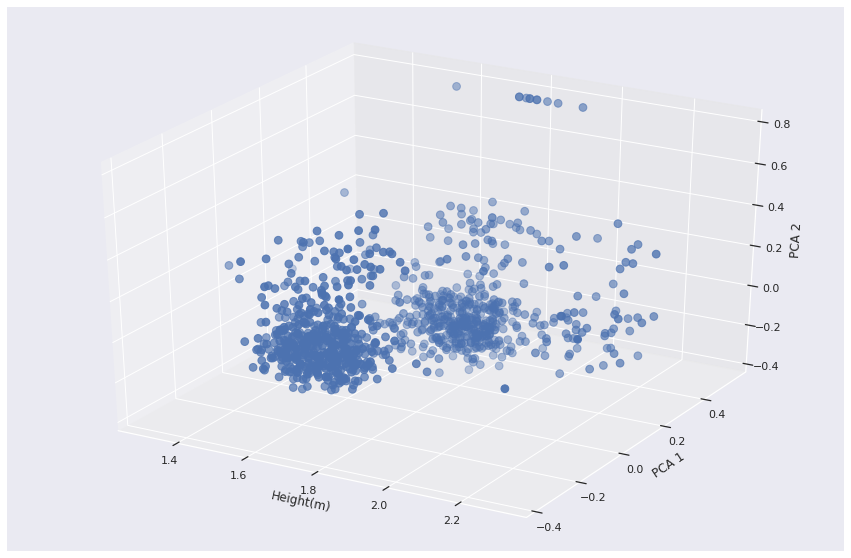

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(plotX)
print(pca.explained_variance_ratio_)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
pca1 = principalDf['principal component 1'].tolist()
pca2 = principalDf['principal component 2'].tolist()
sns.set()
#plt.figure(figsize=(15,10))
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y_height, pca1, pca2, s=60)
ax.set_xlabel('Height(m)', fontsize=12)
ax.set_ylabel('PCA 1', fontsize=12)
ax.set_zlabel('PCA 2', fontsize=12)

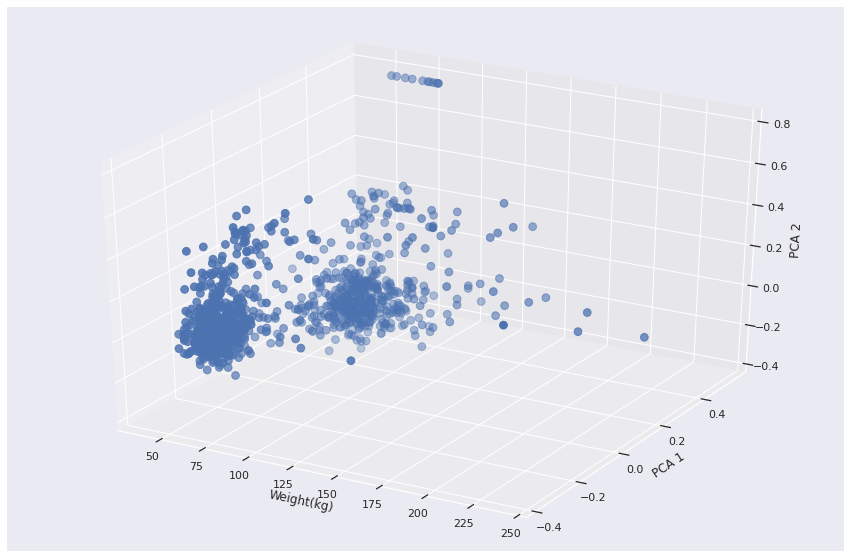

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y_weight, pca1, pca2, s=60)
ax.set_xlabel('Weight(kg)', fontsize=12)
ax.set_ylabel('PCA 1', fontsize=12)
ax.set_zlabel('PCA 2', fontsize=12)
plt.show()

# Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_height_train, y_height_test, y_weight_train, y_weight_test ,y_BMI_train, y_BMI_test = train_test_split(X, y_height,y_weight,y_BMI, random_state=1)

# Metric to check the goodness of fit

*Logarithmic transformation is a convenient means of transforming a highly skewed variable into a more normalized dataset.*  
*We want to produce the smallest error possible when making a prediction, while also taking into account that we should not be overfitting the model.Using the logarithm of one or more variables improves the fit of the model by transforming the distribution of the features to a more normally-shaped bell curve.*

In [ ]:
def report_goodness(model, X_test, y_test, predictor_log=True):
    # Make predictions using the testing set
    y_pred = model.predict(X_test)
    y_true = y_test

    if predictor_log:
        y_true = np.log(y_test)
    # The coefficients
    # The mean squared error
    print("Mean squared error: %.2f"      % mean_squared_error(y_true, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_true, y_pred))
    
    errors = abs(y_pred - y_true)
    mape = 100 * np.mean(errors / y_true)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

# Model selection
We will compare few regression model and select the one with better test score.

We will compare :

**Linear Regression**

**Ridge Linear Regression**

**Random Forest Regressor**

**Kernel Ridge Regression**

In [ ]:
from sklearn.kernel_ridge import KernelRidge
from sklearn import  linear_model
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

**Simple Linear Regression**

*Linear regression, also known as ordinary least squares (OLS) and linear least squares, is the real workhorse of the regression world. Use linear regression to understand the mean change in a dependent variable given a one-unit change in each independent variable.*

**Height**

In [ ]:
model_height = linear_model.LinearRegression()
model_height = model_height.fit(X_train, np.log(y_height_train))
report_goodness(model_height, X_test, y_height_test)

Mean squared error: 0.01
Variance score: 0.31
Model Performance
Average Error: 0.0509 degrees.
Accuracy = 90.22%.


**Weight**

In [ ]:
model_weight = linear_model.LinearRegression()
model_weight = model_weight.fit(X_train, np.log(y_weight_train))
report_goodness(model_height, X_test, y_weight_test)

Mean squared error: 13.57
Variance score: -193.80
Model Performance
Average Error: 3.6763 degrees.
Accuracy = 13.32%.


*We can see we have got a negative value of R2. This means the the distnace between the predicted and actual height is very high or in another words our model has underfitted.*

**BMI**

In [ ]:
model_BMI = linear_model.LinearRegression()
model_BMI = model_BMI.fit(X_train, np.log(y_BMI_train))
report_goodness(model_height, X_test, y_BMI_test)

Mean squared error: 6.58
Variance score: -240.37
Model Performance
Average Error: 2.5612 degrees.
Accuracy = 18.02%.


*We have similar performance in case of BMI as well*

**Ridge Linear Regression**

*Ridge regression allows you to analyze data even when severe multicollinearity is present and helps prevent overfitting. This type of model reduces the large, problematic variance that multicollinearity causes by introducing a slight bias in the estimates. The procedure trades away much of the variance in exchange for a little bias, which produces more useful coefficient estimates when multicollinearity is present.*

**Height**

In [ ]:
model_height = Ridge(fit_intercept=True, alpha=0.0015, random_state=4, normalize=True)
model_height = model_height.fit(X_train, np.log(y_height_train))
report_goodness(model_height, X_test, y_height_test)

Mean squared error: 0.00
Variance score: 0.36
Model Performance
Average Error: 0.0479 degrees.
Accuracy = 90.83%.


**Weight**

In [ ]:
model_weight = Ridge(fit_intercept=True, alpha=0.0015, random_state=4, normalize=True)
model_weight = model_weight.fit(X_train, np.log(y_weight_train))
report_goodness(model_weight, X_test, y_weight_test)

Mean squared error: 0.03
Variance score: 0.60
Model Performance
Average Error: 0.1130 degrees.
Accuracy = 97.39%.


**BMI**

In [ ]:
model_BMI = Ridge(fit_intercept=True, alpha=0.0015, random_state=4, normalize=True)
model_BMI = model_BMI.fit(X_train, np.log(y_BMI_train))
report_goodness(model_BMI, X_test, y_BMI_test)

Mean squared error: 0.01
Variance score: 0.47
Model Performance
Average Error: 0.0839 degrees.
Accuracy = 97.36%.


**Random Forest Regressor**

**Height**

In [ ]:
model_height = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
model_height = model_height.fit(X_train,np.log(y_height_train))
report_goodness(model_height, X_test, y_height_test)

Mean squared error: 0.01
Variance score: 0.30
Model Performance
Average Error: 0.0483 degrees.
Accuracy = 90.78%.


**With hyperparameter tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestRegressor()

In [ ]:
rf_height_model = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_height_model.fit(X_train,np.log(y_height_train))
report_goodness(rf_height_model, X_test, y_height_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 32.8min finished


Mean squared error: 0.00
Variance score: 0.34
Model Performance
Average Error: 0.0472 degrees.
Accuracy = 90.96%.


**Weight**

In [ ]:
model_weight = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
model_weight = model_weight.fit(X_train, np.log(y_weight_train))
report_goodness(model_weight, X_test, y_weight_test)

Mean squared error: 0.04
Variance score: 0.48
Model Performance
Average Error: 0.1306 degrees.
Accuracy = 96.98%.


**With hyperparameter tuning**

In [ ]:
rf_weight_model = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_weight_model.fit(X_train,np.log(y_weight_train))
report_goodness(rf_weight_model,X_test,y_weight_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 37.2min finished


Mean squared error: 0.03
Variance score: 0.59
Model Performance
Average Error: 0.1124 degrees.
Accuracy = 97.41%.


**BMI**

In [ ]:
model_BMI = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
model_BMI = model_BMI.fit(X_train, np.log(y_BMI_train))
report_goodness(model_BMI, X_test, y_BMI_test)

Mean squared error: 0.02
Variance score: 0.31
Model Performance
Average Error: 0.0950 degrees.
Accuracy = 97.01%.


**With hyperparameter tuning**

In [ ]:
rf_BMI_model = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_BMI_model.fit(X_train,np.log(y_BMI_train))
report_goodness(rf_BMI_model, X_test, y_BMI_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 38.9min finished


Mean squared error: 0.02
Variance score: 0.43
Model Performance
Average Error: 0.0830 degrees.
Accuracy = 97.40%.


**Kernel Ridge Regression**

**Height**

In [ ]:
model_height_kridge = KernelRidge(kernel='rbf', gamma=0.21, alpha=0.0017)
model_height_kridge = model_height_kridge.fit(X_train, np.log(y_height_train))
report_goodness(model_height_kridge, X_test, y_height_test)

Mean squared error: 0.01
Variance score: 0.29
Model Performance
Average Error: 0.0513 degrees.
Accuracy = 90.18%.


**Weight**

In [ ]:
model_weight_kridge = KernelRidge(kernel='rbf', gamma=0.21, alpha=0.0017)
model_weight_kridge = model_weight_kridge.fit(X_train, np.log(y_weight_train))
report_goodness(model_weight_kridge, X_test, y_weight_test)

Mean squared error: 0.03
Variance score: 0.54
Model Performance
Average Error: 0.1243 degrees.
Accuracy = 97.10%.


**BMI**

In [ ]:
model_BMI_kridge = KernelRidge(kernel='rbf', gamma=0.21, alpha=0.0017)
model_BMI_kridge = model_BMI_kridge.fit(X_train, np.log(y_BMI_train))
report_goodness(model_BMI_kridge, X_test, y_BMI_test)

Mean squared error: 0.02
Variance score: 0.32
Model Performance
Average Error: 0.1042 degrees.
Accuracy = 96.70%.


**Conclusion :**

*We found that Random Forest Regresssor with hyperparameter tuning outperformed all the models in terms of the mean squared error and expalined variance*

**Save All Models**

In [ ]:
from sklearn.externals import joblib

height_model = '/content/drive/My Drive/Face_to_BMI/Models/rf_height_model'
weight_model = '/content/drive/My Drive/Face_to_BMI/Models/rf_weight_model'
bmi_model = '/content/drive/My Drive/Face_to_BMI/Models/rf_BMI_model'

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
joblib.dump(rf_height_model, height_model)
joblib.dump(rf_weight_model, weight_model)
joblib.dump(rf_BMI_model, bmi_model)

**Load the Models**

In [ ]:
height_predictor = joblib.load(height_model)
weight_predictor = joblib.load(weight_model)
bmi_predictor = joblib.load(bmi_model)

**Predict**

In [ ]:
def predict_height_width_BMI(test_image, height_model, weight_model, bmi_model):
    test_array = np.expand_dims(np.array(get_face_encoding(test_image)), axis=0)
    height = np.exp(height_model.predict(test_array)).item()
    weight = np.exp(weight_model.predict(test_array)).item()
    bmi = np.exp(bmi_model.predict(test_array)).item()
    return 'Height: {}m\nWeight: {}kg\nBmi: {}kg/m^2'.format(round(height, 2), round(weight, 2), round(bmi, 2))

In [ ]:
#@title
import ipywidgets as widgets
from IPython.display import display 
import os
images = os.listdir('/content/drive/My Drive/Face_to_BMI/Test Images')
for img in images:
  img_loc = '/content/drive/My Drive/Face_to_BMI/Test Images/' + img
  img_file = open(img_loc, 'rb')
  test_img = img_file.read()
  pred = predict_height_width_BMI(img_loc, height_predictor, weight_predictor, bmi_predictor)
  display(widgets.Image(value=test_img, format='jpg', width=300, height=400))
  print(pred)

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xed\x0b,Photoshop 3.0\x008BIM…

Height: 2.01m
Weight: 87.55kg
Bmi: 21.53kg/m^2


Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xfe\x00;CREATOR: gd-jpe…

Height: 1.77m
Weight: 78.44kg
Bmi: 24.39kg/m^2


Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xfe\x00;CREATOR: gd-jpe…

Height: 1.86m
Weight: 77.67kg
Bmi: 25.55kg/m^2


Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xe1F\xdaExif\x00\x00MM\x00*\x…

Height: 1.84m
Weight: 70.79kg
Bmi: 24.71kg/m^2


Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\…

Height: 1.84m
Weight: 89.04kg
Bmi: 21.76kg/m^2


Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x03\x02…

Height: 1.72m
Weight: 53.47kg
Bmi: 16.9kg/m^2


Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xe11\xccExif\x00\x00MM\x00*\x…

Height: 1.56m
Weight: 69.76kg
Bmi: 28.0kg/m^2


Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x06\x06…

Height: 1.67m
Weight: 60.9kg
Bmi: 27.12kg/m^2
